<a href="https://colab.research.google.com/github/ChiNonsoHenry16/ChiNonsoHenry16/blob/main/CRA_Exam_Data_Analysis_using_Two_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TITLE: Analysis including Data Exploration and preprocessing, Regression, Quantitative Analysis and Visualization using Two Datasets.


**Question 1**: Data exploration and preprocessing (25 points)

Imports the files module from the google.colab package in Google Colab. The files module provides functions for interacting with files, particularly for uploading and downloading files in a Colab notebook.

Imports the pandas library and assigns it the alias pd. The pandas library is a powerful data manipulation and analysis library in Python



In [ ]:
from google.colab import files
import pandas as pd

Check inconsistencies in the Ident.csv dataset. Upload Ident.csv file. Then, read Ident CSV file into DataFrame

In [ ]:
uploaded_ident = files.upload()
ident_df = pd.read_csv(next(iter(uploaded_ident)))

Saving ident.csv to ident.csv


Install and Import datetime module; this is because it is needed in the check data disctionary consistency function below.

In [ ]:
!pip install datetime
import datetime

Step 1:1 - Function to check consistency of the Ident.csv dataset with data dictionary. After checking for consistency, the new ident.csv dataset is now saved as cleaned_ident.csv. The original dataset and inconsistent rows were also saved for confirmation of the checks.



In [ ]:
def check_consistency(row):
    # Check conditions for inconsistency
    if not (1 <= row['clt_prov'] <= 13):
        return True  # Inconsistent provincial code
    if row['clt_fil'] not in [0, 1, 2]:
        return True  # Inconsistent on-time filing status
    if row['clt_lang'] not in [0, 1]:
        return True  # Inconsistent preferred language
    if row['clt_drink'] not in [0, 1]:
        return True  # Inconsistent preferred drink

    # Check age based on date of birth
    date_of_birth = pd.to_datetime(row['clt_date'])
    threshold_date = datetime.datetime.now() - datetime.timedelta(days=365 * 100)  # 100 years ago

    if date_of_birth > threshold_date:
        return True  # Inconsistent age

    return False  # No inconsistency found

# Filter inconsistent rows
inconsistent_rows = ident_df.apply(check_consistency, axis=1)
consistent_df = ident_df[inconsistent_rows]

# Remove inconsistent rows from the original dataset
ident_df = ident_df[~inconsistent_rows]

# Save the cleaned dataset
#ident_df.to_csv("/content/cleaned_ident.csv", index=False)
ident_df.to_csv("/content/inconsistent_ident.csv", index=False)

# Save the inconsistent rows as a separate CSV file
#inconsistent_df.to_csv("/content/inconsistent_ident.csv", index=False)
consistent_df.to_csv("/content/cleaned_ident.csv", index=False)

**STEP 1.1 (B)** - Since the clt_child is howing to have a different data type, I decided to treat it differently. I deleted the rows with XX and then changed the data type of the consistent.df. This dataframe was now saved inside cleaned_ident.csv, as the fresh ident.csv dataset.

In [ ]:
# Delete rows where clt_child is equal to 'XX'
consistent_df = consistent_df[consistent_df['clt_child'] != 'XX']

In [ ]:
# Change the data type of the clt_child column to integer
consistent_df['clt_child'] = consistent_df['clt_child'].astype(int)

In [ ]:
# Save the cleaned DataFrame to "/content/cleaned_ident.csv"
consistent_df.to_csv("/content/cleaned_ident.csv", index=False)

STEP 1.1 (C). Confirming the issues with clt_lang column and deleting it.

In [ ]:
def check_clt_lang_inconsistency(value):
    # Define conditions for inconsistency
    if value not in [0, 1]:
        return True  # Inconsistent value
    else:
        return False  # Consistent value

# Apply the consistency check function to the 'clt_lang' column
inconsistent_rows = consistent_df['clt_lang'].apply(check_clt_lang_inconsistency)

# Filter out the inconsistent rows
inconsistent_df = consistent_df[inconsistent_rows]

# Display the inconsistent rows or save them to a CSV file
print("Inconsistent Rows in clt_lang:")
print(inconsistent_df)

Inconsistent Rows in clt_lang:
       clt_id   clt_prov    clt_date clt_imm_date  clt_fil  clt_lang  \
115       1085        12  1983-08-24   2012-03-16        0     99999   
142       1074         7  1990-01-08   0000-01-01        0     99999   
800       1307         7  1956-12-08   1998-01-03        1     99999   
1051       414         4  1955-07-30   1988-04-21        1     99999   
1243      1107         2  1946-04-09   1992-03-31        0     99999   
1288       504         5  1994-03-31   2016-04-03        1     99999   
1334       261        11  1969-12-29   0000-01-01        0     99999   
1376      1098        12  1978-12-06   2008-08-28        2     99999   
1377       587         2  2001-04-12   0000-01-01        0     99999   
1388      1174        13  1944-07-28   0000-01-01        2     99999   
1423       575         4  1940-07-16   2014-02-24        1     99999   
1440       332         4  2002-01-12   0000-01-01        2     99999   
1468       615         8  1981-12

There is need to confirm the data types of the new data frame. This is neecssary if there is a need to change the data type of the clt_lang column. Since it is integer, no data type conversion is necessary.

In [ ]:
data_types = consistent_df.dtypes

# Display the data types
print("Data Types:")
print(data_types)

Data Types:
 clt_id          int64
clt_prov         int64
clt_date        object
clt_imm_date    object
clt_fil          int64
clt_lang         int64
clt_drink        int64
clt_child        int64
dtype: object


In [ ]:
# Delete rows where 'clt_lang' has the value 99999
consistent_df = consistent_df[consistent_df['clt_lang'] != 99999]

# Save the cleaned DataFrame to "/content/cleaned_ident.csv"
consistent_df.to_csv("/content/cleaned_ident.csv", index=False)

In [ ]:
#Confirm the existence of the rows with "99999" before deletion.
invalid_rows = consistent_df[consistent_df['clt_lang'] == 99999]
print("Rows where 'clt_lang' has the value 99999:")
print(invalid_rows)

Rows where 'clt_lang' has the value 99999:
       clt_id   clt_prov    clt_date clt_imm_date  clt_fil  clt_lang  \
115       1085        12  1983-08-24   2012-03-16        0     99999   
142       1074         7  1990-01-08   0000-01-01        0     99999   
800       1307         7  1956-12-08   1998-01-03        1     99999   
1051       414         4  1955-07-30   1988-04-21        1     99999   
1243      1107         2  1946-04-09   1992-03-31        0     99999   
1288       504         5  1994-03-31   2016-04-03        1     99999   
1334       261        11  1969-12-29   0000-01-01        0     99999   
1376      1098        12  1978-12-06   2008-08-28        2     99999   
1377       587         2  2001-04-12   0000-01-01        0     99999   
1388      1174        13  1944-07-28   0000-01-01        2     99999   
1423       575         4  1940-07-16   2014-02-24        1     99999   
1440       332         4  2002-01-12   0000-01-01        2     99999   
1468       615       

In [ ]:
#Confirming the deletion of the rows with "99999". Other ways to mamage these rows are added in the document.
invalid_rows = consistent_df[consistent_df['clt_lang'] == 99999]
print("Rows where 'clt_lang' has the value 99999:")
print(invalid_rows)

Rows where 'clt_lang' has the value 99999:
Empty DataFrame
Columns: [ clt_id , clt_prov, clt_date, clt_imm_date, clt_fil, clt_lang, clt_drink, clt_child]
Index: []


**STEP 1.1**- Data wrangling and preparation of the assessment.csv file

*   Upload assessment.csv file
*   Read the assessment CSV file into a dataFrame
*   Replace NULLs in Assess dataset with zeros




In [ ]:
uploaded_assessment = files.upload()
assess_df = pd.read_csv(next(iter(uploaded_assessment)))
assess_df = assess_df.fillna(0)

Saving assessment.csv to assessment.csv


**STEP 1:2** - Performing merging with clt_id and working with clt_tax_nb to find the most recent assessment.

*   The pd.to_numeric function is used to convert the clt_tax_nb column in the "Assess" dataset to numeric. This is important for sorting later.
*   The datasets are merged using the 'clt_id' column as the common variable.
*   The merged DataFrame is sorted by 'clt_id' and 'clt_tax_nb' in descending order to have the most recent assessments at the top.
*   The drop_duplicates function is used to keep only the first occurrence (most recent assessment) for each unique 'clt_id'.
*   The final merged and filtered DataFrame is saved to a CSV file named "merged_dataset.csv".



In [ ]:
#This is to confirm that clt_id exists in both dataframes.
#But the result also shows that clt_id inside ident.df, which is now consistent.df has extra spaces.
#While clt_id in the assess.df do not have extra spaces. So there is need to remove extra spaces.
print("Ident columns:", consistent_df.columns)
print("Assess columns:", assess_df.columns)

Ident columns: Index([' clt_id ', 'clt_prov', 'clt_date', 'clt_imm_date', 'clt_fil',
       'clt_lang', 'clt_drink', 'clt_child'],
      dtype='object')
Assess columns: Index(['clt_id', 'clt_tax_nb', 'clt_emp_1', 'clt_emp_2', 'clt_emp_3'], dtype='object')


In [ ]:
# Since there is 'clt_id' in Assess and ' clt_id ' in Ident, the following strip whitespaces and convert to lowercase for uniformity
consistent_df.columns = consistent_df.columns.str.strip().str.lower()
assess_df.columns = assess_df.columns.str.strip().str.lower()

In [ ]:
# Convert clt_tax_nb to numeric
assess_df['clt_tax_nb'] = pd.to_numeric(assess_df['clt_tax_nb'], errors='coerce')

# Merge datasets using the common variable 'clt_id'
merged_df = pd.merge(consistent_df, assess_df, on='clt_id', how='left')

# Keep only rows with the most recent assessments for each taxpayer (clt_id)
merged_df = merged_df.sort_values(by=['clt_id', 'clt_tax_nb'], ascending=[True, False])
merged_df = merged_df.drop_duplicates(subset='clt_id')

# Save the merged dataset as henry_nwokoye1.csv in the Colab environment.
# This is just a test save to ensure I am on the right track.
merged_df.to_csv("henry_nwokoye1.csv", index=False)

In [ ]:
# Display the first five rows of the merged dataset
print(merged_df.head())

      clt_id  clt_prov    clt_date clt_imm_date  clt_fil  clt_lang  clt_drink  \
1684       1        10  1967-06-21   2018-03-13        2         1          1   
149        2         7  1950-12-25   2020-11-25        2         0          1   
6662       4        10  1985-09-15   2014-05-30        2         0          0   
6499       5         7  1940-09-22   1996-07-20        1         0          0   
428        6         4  1968-07-03   1976-05-29        0         1          1   

      clt_child  clt_tax_nb  clt_emp_1  clt_emp_2  clt_emp_3  
1684          4          12    92197.0        0.0        0.0  
149           2          12    68486.0        0.0        0.0  
6662          3          12   122559.0        0.0    42200.0  
6499          0           8   142742.0        0.0    11870.0  
428           2          11    66431.0        0.0        0.0  


In [ ]:
# Display the last five rows of the merged dataset
print(merged_df.tail())

      clt_id  clt_prov    clt_date clt_imm_date  clt_fil  clt_lang  clt_drink  \
6018    1631         2  1948-07-13   2008-09-11        1         1          0   
7351    1632        12  1973-06-03   0000-01-01        1         0          1   
3738    1633         7  1940-07-29   1965-05-10        0         0          1   
730     1634         4  1976-03-25   0000-01-01        1         0          0   
3372    1635         9  1994-07-24   1997-10-25        0         1          1   

      clt_child  clt_tax_nb  clt_emp_1  clt_emp_2  clt_emp_3  
6018          4          11    20954.0        0.0        0.0  
7351          2          12        0.0        0.0    31253.0  
3738          5          11    74708.0        0.0        0.0  
730           3          12        0.0   135927.0        0.0  
3372          2           1   192452.0        0.0    36804.0  


**STEP 1:3** -  Calculate age [clt_age] where the age of an individual is based on the age of the taxpayer on December 31, 2021. Truncate all decimals if any.

Confirm the columns in the merged.df data frame

In [ ]:
print("all columns:", merged_df.columns)

all columns: Index(['clt_id', 'clt_prov', 'clt_date', 'clt_imm_date', 'clt_fil', 'clt_lang',
       'clt_drink', 'clt_child', 'clt_tax_nb', 'clt_emp_1', 'clt_emp_2',
       'clt_emp_3'],
      dtype='object')


Finding clt_age

* The 'clt_date' column is converted to the datetime format using pd.to_datetime.
* The age is calculated by subtracting the 'clt_date' from December 31, 2021, and converting the result to years using astype('<m8[Y]').astype(int).

* Any decimals in the age column are truncated using astype(int).

Now, the DataFrame 'merged_df' will have a new column 'clt_age' representing the age of each individual as of December 31, 2021.



In [ ]:
# Convert 'clt_date' to datetime format
merged_df['clt_date'] = pd.to_datetime(merged_df['clt_date'])

# Calculate age based on the date of birth and December 31, 2021
merged_df['clt_age'] = (pd.to_datetime('2021-12-31') - merged_df['clt_date']).astype('<m8[Y]').astype(int)

# Truncate decimals (if any)
merged_df['clt_age'] = merged_df['clt_age'].astype(int)

# Display the DataFrame with the new 'clt_age' column
print(merged_df)

      clt_id  clt_prov   clt_date clt_imm_date  clt_fil  clt_lang  clt_drink  \
1684       1        10 1967-06-21   2018-03-13        2         1          1   
149        2         7 1950-12-25   2020-11-25        2         0          1   
6662       4        10 1985-09-15   2014-05-30        2         0          0   
6499       5         7 1940-09-22   1996-07-20        1         0          0   
428        6         4 1968-07-03   1976-05-29        0         1          1   
...      ...       ...        ...          ...      ...       ...        ...   
6018    1631         2 1948-07-13   2008-09-11        1         1          0   
7351    1632        12 1973-06-03   0000-01-01        1         0          1   
3738    1633         7 1940-07-29   1965-05-10        0         0          1   
730     1634         4 1976-03-25   0000-01-01        1         0          0   
3372    1635         9 1994-07-24   1997-10-25        0         1          1   

      clt_child  clt_tax_nb  clt_emp_1 

**STEP 1:4** - Calculate total income [clt_emp_tot] where an individual total income is the sum of employment income (clt_emp_1), self-employment income (clt_emp_2), and other income (clt_emp_3).

*   income_columns is a list containing the relevant income columns ('clt_emp_1', 'clt_emp_2', 'clt_emp_3').
*   merged_df[income_columns].sum(axis=1) calculates the sum of values across the specified income columns for each row.
*   The result is assigned to a new column 'clt_emp_tot' in the DataFrame 'merged_df'.



In [ ]:
income_columns = ['clt_emp_1', 'clt_emp_2', 'clt_emp_3']
merged_df['clt_emp_tot'] = merged_df[income_columns].sum(axis=1)
# Display the DataFrame with the new 'clt_emp_tot' column
print(merged_df)

      clt_id  clt_prov   clt_date clt_imm_date  clt_fil  clt_lang  clt_drink  \
1684       1        10 1967-06-21   2018-03-13        2         1          1   
149        2         7 1950-12-25   2020-11-25        2         0          1   
6662       4        10 1985-09-15   2014-05-30        2         0          0   
6499       5         7 1940-09-22   1996-07-20        1         0          0   
428        6         4 1968-07-03   1976-05-29        0         1          1   
...      ...       ...        ...          ...      ...       ...        ...   
6018    1631         2 1948-07-13   2008-09-11        1         1          0   
7351    1632        12 1973-06-03   0000-01-01        1         0          1   
3738    1633         7 1940-07-29   1965-05-10        0         0          1   
730     1634         4 1976-03-25   0000-01-01        1         0          0   
3372    1635         9 1994-07-24   1997-10-25        0         1          1   

      clt_child  clt_tax_nb  clt_emp_1 

**Step 1.5:** Calculate the number of years [clt_yrs_can] an individual lived in Canada as of December 31, 2021. For immigrants, it would be calculated based on immigration date and for those born in Canada, it would be calculated based on their birth date. Truncate all decimals if any.

In [ ]:
print("all columns:", merged_df.columns)

all columns: Index(['clt_id', 'clt_prov', 'clt_date', 'clt_imm_date', 'clt_fil', 'clt_lang',
       'clt_drink', 'clt_child', 'clt_tax_nb', 'clt_emp_1', 'clt_emp_2',
       'clt_emp_3', 'clt_age', 'clt_emp_tot'],
      dtype='object')


Convert 'clt_date' and 'clt_imm_date' to datetime format

In [ ]:
merged_df['clt_date'] = pd.to_datetime(merged_df['clt_date'])
merged_df['clt_imm_date'] = pd.to_datetime(merged_df['clt_imm_date'], errors='coerce')

# Calculate 'clt_yrs_can' based on immigration date for immigrants and birth date for those born in Canada
merged_df['clt_yrs_can'] = (pd.to_datetime('2021-12-31') - merged_df['clt_imm_date']).dt.days // 365
born_in_canada_mask = merged_df['clt_imm_date'].isna()
merged_df.loc[born_in_canada_mask, 'clt_yrs_can'] = (pd.to_datetime('2021-12-31') - merged_df.loc[born_in_canada_mask, 'clt_date']).dt.days // 365

# Truncate decimals (if any)
merged_df['clt_yrs_can'] = merged_df['clt_yrs_can'].astype(int)

# Display the DataFrame with the new 'clt_yrs_can' column
print(merged_df)

      clt_id  clt_prov   clt_date clt_imm_date  clt_fil  clt_lang  clt_drink  \
1684       1        10 1967-06-21   2018-03-13        2         1          1   
149        2         7 1950-12-25   2020-11-25        2         0          1   
6662       4        10 1985-09-15   2014-05-30        2         0          0   
6499       5         7 1940-09-22   1996-07-20        1         0          0   
428        6         4 1968-07-03   1976-05-29        0         1          1   
...      ...       ...        ...          ...      ...       ...        ...   
6018    1631         2 1948-07-13   2008-09-11        1         1          0   
7351    1632        12 1973-06-03          NaT        1         0          1   
3738    1633         7 1940-07-29   1965-05-10        0         0          1   
730     1634         4 1976-03-25          NaT        1         0          0   
3372    1635         9 1994-07-24   1997-10-25        0         1          1   

      clt_child  clt_tax_nb  clt_emp_1 

**Step 1.6:** Export and save your final combined dataset as CSV format with the following naming convention: “firstname_lastname.csv” or, as an example,  “John_Doe.csv”.


In [ ]:
# Save the merged dataset as henry_nwokoye.csv in the Colab environment
merged_df.to_csv("henry_nwokoye.csv", index=False)

In [ ]:
print(merged_df.head())

      clt_id  clt_prov   clt_date clt_imm_date  clt_fil  clt_lang  clt_drink  \
1684       1        10 1967-06-21   2018-03-13        2         1          1   
149        2         7 1950-12-25   2020-11-25        2         0          1   
6662       4        10 1985-09-15   2014-05-30        2         0          0   
6499       5         7 1940-09-22   1996-07-20        1         0          0   
428        6         4 1968-07-03   1976-05-29        0         1          1   

      clt_child  clt_tax_nb  clt_emp_1  clt_emp_2  clt_emp_3  clt_age  \
1684          4          12    92197.0        0.0        0.0       54   
149           2          12    68486.0        0.0        0.0       71   
6662          3          12   122559.0        0.0    42200.0       36   
6499          0           8   142742.0        0.0    11870.0       81   
428           2          11    66431.0        0.0        0.0       53   

      clt_emp_tot  clt_yrs_can  
1684      92197.0            3  
149       6848

**Question 2** – Quantitative analysis and visualization (10 points)
For this question, please use the dataset “Clean_Q2.csv” and not the one you created in Question 1. Assume all NULLs are zeros. All answers must be provided under each question, otherwise, they will not be graded.


Data wrangling and preparation of the assessment.csv file
*  Upload Clean_Q2.csv file
*  Read the Clean_Q2.csv file into a dataFrame
*  Replace NULLs in ghe clt_inc column of Clean_Q2 dataset with zeros



In [ ]:
uploaded_Clean_Q2 = files.upload()
Clean_Q2_df = pd.read_csv(next(iter(uploaded_Clean_Q2)))
Clean_Q2_df['clt_inc'] = Clean_Q2_df['clt_inc'].fillna(0)

Saving Clean_Q2.csv to Clean_Q2.csv


In [ ]:
print("columns:", Clean_Q2_df.columns)

all columns: Index(['indv_id', 'clt_inc', 'clt_ind_age', 'clt_sex', 'clt_mstatus',
       'clt_method', 'clt_animal', 'clt_education'],
      dtype='object')


In [ ]:
# Convert 'clt_inc' column to numeric
#df['clt_inc'] = pd.to_numeric(df['clt_inc'], errors='coerce')

In [ ]:
print("columns:", Clean_Q2_df.columns)

columns: Index(['indv_id', 'clt_inc', 'clt_ind_age', 'clt_sex', 'clt_mstatus',
       'clt_method', 'clt_animal', 'clt_education'],
      dtype='object')


**STEP 2A** - Creating a box plot using one color palette (viridis).

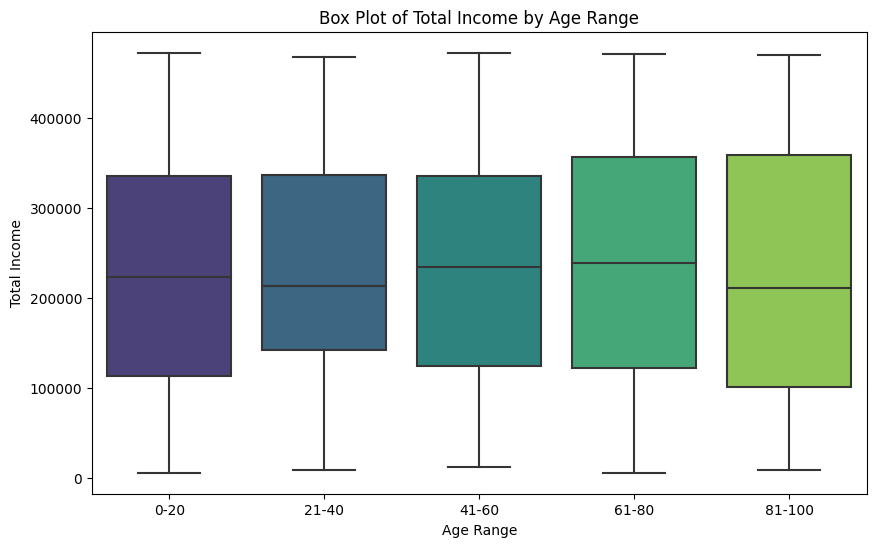

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define age ranges
age_ranges = [(0, 20), (21, 40), (41, 60), (61, 80), (81, 100)]

# Create a new column 'age_group' based on age ranges
Clean_Q2_df['age_group'] = pd.cut(Clean_Q2_df['clt_ind_age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a box plot
sns.boxplot(x='age_group', y='clt_inc', data=Clean_Q2_df, palette='viridis')

# Set title and labels
plt.title('Box Plot of Total Income by Age Range')
plt.xlabel('Age Range')
plt.ylabel('Total Income')

# Show the plot
plt.show()

Create subplots to display the box plots with different color palettes. This is to experiment and see how they affect the visual appearance of the plot.

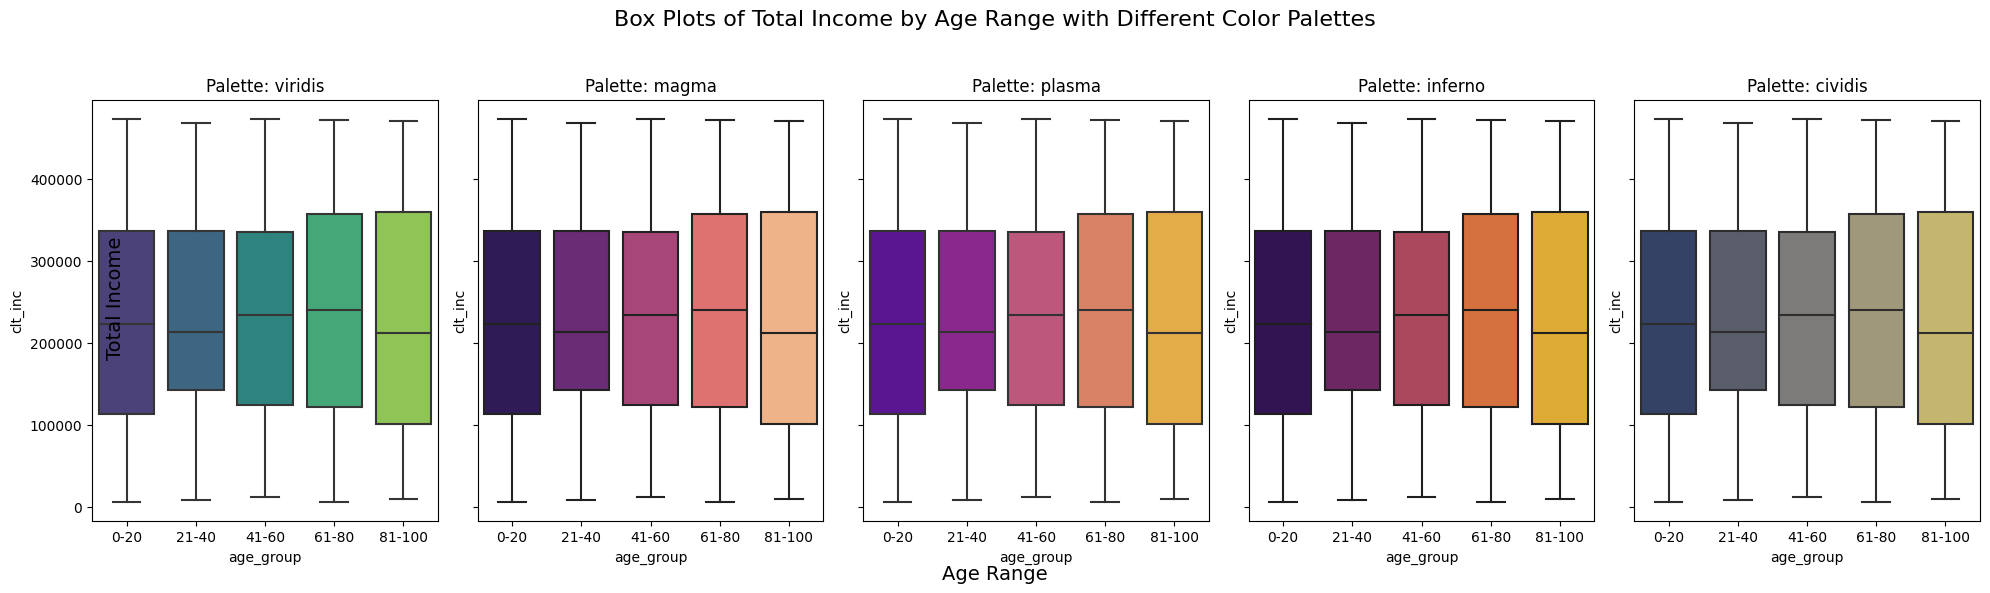

In [ ]:
# Define age ranges
age_ranges = [(0, 20), (21, 40), (41, 60), (61, 80), (81, 100)]

# Create a new column 'age_group' based on age ranges
Clean_Q2_df['age_group'] = pd.cut(Clean_Q2_df['clt_ind_age'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '21-40', '41-60', '61-80', '81-100'])

# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(20, 6), sharey=True)

# List of color palettes and this is to see how they affect the visual appearance of the plot
palettes = ['viridis', 'magma', 'plasma', 'inferno', 'cividis']

# Create box plots with different color palettes
for i, palette in enumerate(palettes):
    sns.boxplot(x='age_group', y='clt_inc', data=Clean_Q2_df, palette=palette, ax=axes[i])
    axes[i].set_title(f'Palette: {palette}')

# Set title and labels for the overall plot
fig.suptitle('Box Plots of Total Income by Age Range with Different Color Palettes', fontsize=16)
fig.text(0.5, 0.04, 'Age Range', ha='center', va='center', fontsize=14)
fig.text(0.06, 0.5, 'Total Income', ha='center', va='center', rotation='vertical', fontsize=14)

# Adjust layout to prevent clipping of titles
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Show the plot
plt.show()

STEP 2(B) - 5 components of any “box plot”, which include "minimum score, first (lower) quartile, median, third (upper) quartile, and maximum score".

* Filter data for the age range 21-40
* Display statistics for the clt_inc column in the age range 21-40
* Print the statistics





In [ ]:
subset_df = Clean_Q2_df[Clean_Q2_df['age_group'] == '21-40']
statistics = subset_df['clt_inc'].describe()
print(statistics)

count       156.000000
mean     234867.089744
std      125243.067010
min        8550.000000
25%      142544.250000
50%      212920.000000
75%      336185.000000
max      468040.000000
Name: clt_inc, dtype: float64


Here, round(2) is used to round the descriptive statistics to two decimal places after the whole number

In [ ]:
subset_df = Clean_Q2_df[Clean_Q2_df['age_group'] == '21-40']
statistics = subset_df['clt_inc'].describe().round(2)
print(statistics)

count       156.00
mean     234867.09
std      125243.07
min        8550.00
25%      142544.25
50%      212920.00
75%      336185.00
max      468040.00
Name: clt_inc, dtype: float64


Put the values in a table. Convert the Series to a dataFrame, display it and save it to a CSV file.

In [ ]:
import pandas as pd

# Create a Series with the given statistics
statistics_series = pd.Series({
    'count': 156.00,
    'mean': 234867.09,
    'std': 125243.07,
    'min': 8550.00,
    '25%': 142544.25,
    '50%': 212920.00,
    '75%': 336185.00,
    'max': 468040.00
}, name='clt_inc')

statistics_df = pd.DataFrame(statistics_series).reset_index()
statistics_df.columns = ['Statistic', 'Value']

print(statistics_df)

statistics_df.to_csv('clt_inc_statistics_table.csv', index=False)

  Statistic      Value
0     count     156.00
1      mean  234867.09
2       std  125243.07
3       min    8550.00
4       25%  142544.25
5       50%  212920.00
6       75%  336185.00
7       max  468040.00


**Question 3** – Regression analysis

In [ ]:
print("columns:", Clean_Q2_df.columns)

columns: Index(['indv_id', 'clt_inc', 'clt_ind_age', 'clt_sex', 'clt_mstatus',
       'clt_method', 'clt_animal', 'clt_education', 'age_group'],
      dtype='object')


**3A**- Finding correlation without runnung the regression model.

In [ ]:
import pandas as pd
import numpy as np

# Define independent variables
independent_vars = ['clt_ind_age', 'clt_sex', 'clt_mstatus', 'clt_method', 'clt_animal', 'clt_education']

# Add 'clt_inc' as the dependent variable
variables_of_interest = ['clt_inc'] + independent_vars

# Subset the DataFrame with the relevant columns
subset_df = Clean_Q2_df[variables_of_interest]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Display the correlation matrix
print(correlation_matrix)

                clt_inc  clt_ind_age   clt_sex  clt_mstatus  clt_method  \
clt_inc        1.000000    -0.002188 -0.020048    -0.058160   -0.044108   
clt_ind_age   -0.002188     1.000000  0.010039    -0.018326    0.042719   
clt_sex       -0.020048     0.010039  1.000000     0.032134    0.049080   
clt_mstatus   -0.058160    -0.018326  0.032134     1.000000    0.025023   
clt_method    -0.044108     0.042719  0.049080     0.025023    1.000000   
clt_animal    -0.039060     0.039070  0.076746    -0.021400    0.018267   
clt_education -0.037196     0.019235 -0.033997     0.024489    0.003108   

               clt_animal  clt_education  
clt_inc         -0.039060      -0.037196  
clt_ind_age      0.039070       0.019235  
clt_sex          0.076746      -0.033997  
clt_mstatus     -0.021400       0.024489  
clt_method       0.018267       0.003108  
clt_animal       1.000000      -0.029634  
clt_education   -0.029634       1.000000  


Plotting a heat map for the correlation instead for easier identification

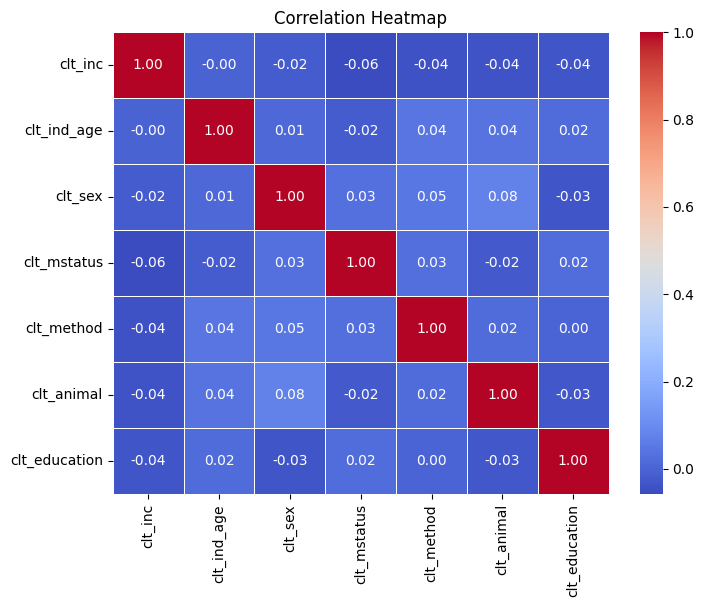

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define independent variables
independent_vars = ['clt_ind_age', 'clt_sex', 'clt_mstatus', 'clt_method', 'clt_animal', 'clt_education']

# Add 'clt_inc' as the dependent variable
variables_of_interest = ['clt_inc'] + independent_vars

# Subset the DataFrame with the relevant columns
subset_df = Clean_Q2_df[variables_of_interest]

# Calculate the correlation matrix
correlation_matrix = subset_df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

As it a bit confusing, I decided to extract the variable with the highest absolute correlation. Thsi is because higher absolute values indicate stronger correlations.

In [ ]:
# Extract the correlations with 'clt_inc'
correlations_with_clt_inc = correlation_matrix['clt_inc'].abs()

# Exclude 'clt_inc' from the list
correlations_with_clt_inc = correlations_with_clt_inc.drop('clt_inc')

# Find the variable with the highest absolute correlation
most_important_var = correlations_with_clt_inc.idxmax()

print(f"The most important variable is: {most_important_var}")

The most important variable is: clt_mstatus


Since the question requires finding more than one variable to use, I decided to list in descending order of their absolute correlation with 'clt_inc'.

In [ ]:
# Extract the correlations with 'clt_inc'
correlations_with_clt_inc = correlation_matrix['clt_inc'].abs()

# Exclude 'clt_inc' from the list
correlations_with_clt_inc = correlations_with_clt_inc.drop('clt_inc')

# Sort variables based on the absolute correlation in descending order
sorted_variables = correlations_with_clt_inc.sort_values(ascending=False)

print("Variables sorted by absolute correlation with clt_inc:")
print(sorted_variables)

Variables sorted by absolute correlation with clt_inc:
clt_mstatus      0.058160
clt_method       0.044108
clt_animal       0.039060
clt_education    0.037196
clt_sex          0.020048
clt_ind_age      0.002188
Name: clt_inc, dtype: float64


3B - Checking if there is one-hot encoding on the Clean_Q2_df dataset. This method of checking for encoding using appraoches such as checking column names.

In [ ]:
# Assuming 'df' is your DataFrame after one-hot encoding
print(Clean_Q2_df.head())  # Display the first few rows of the DataFrame

# Check the column names
print(Clean_Q2_df.columns)

# Check if additional columns have been created
original_columns = ['clt_ind_age', 'clt_education', 'clt_inc']  # List your original columns
encoded_columns = [col for col in Clean_Q2_df.columns if col not in original_columns]

if encoded_columns:
    print("One-hot encoding has been done.")
    print("Additional columns created:", encoded_columns)
else:
    print("No one-hot encoding has been performed.")

   indv_id  clt_inc  clt_ind_age  clt_sex  clt_mstatus  clt_method  \
0        1     7284           10        0            0           0   
1        2   439923           28        1            0           0   
2        3   195093           86        1            0           1   
3        4    44104           54        2            1           1   
4        5    87580           12        0            1           1   

   clt_animal  clt_education  
0           1              4  
1           0              2  
2           0              3  
3           0              1  
4           0              5  
Index(['indv_id', 'clt_inc', 'clt_ind_age', 'clt_sex', 'clt_mstatus',
       'clt_method', 'clt_animal', 'clt_education'],
      dtype='object')
One-hot encoding has been done.
Additional columns created: ['indv_id', 'clt_sex', 'clt_mstatus', 'clt_method', 'clt_animal']


**QUESTION 4** - ES-04 ONLY – Quantitative analysis and visualization (30 points). I tried several types of plots to know the one that is more effective in depicting the data and showing any relationship, if any.

First of all, check if the data set has null values. And as the result shows that it does niot have null values, we can go ahead with the visualizations.

In [ ]:
if Clean_Q2_df.isnull().any().any():
    print("The DataFrame has null values.")
    # You can also print the count of null values in each column
    print(Clean_Q2_df.isnull().sum())
else:
    print("The DataFrame does not have any null values.")

The DataFrame does not have any null values.


Scatter plot that shows total income ([clt_inc]) by age ([clt_ind_age]) for specific education levels ([clt_education]).

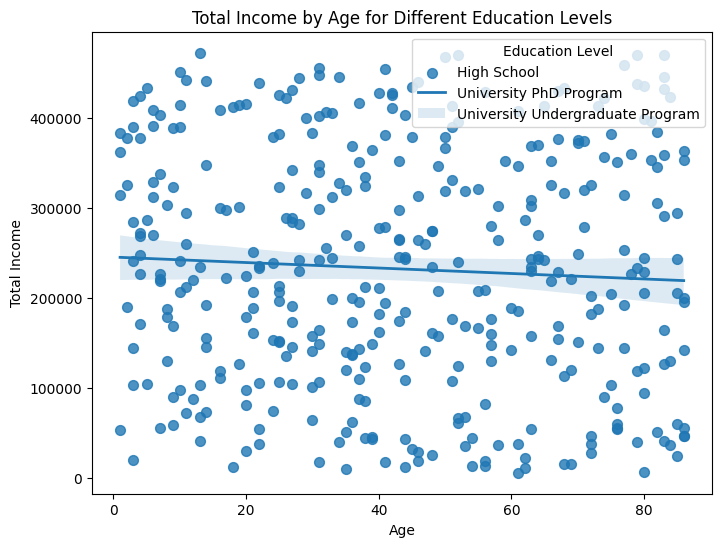

In [ ]:
# Filter the DataFrame for specific education levels
selected_education_levels = [1, 3, 5]
filtered_df = Clean_Q2_df[Clean_Q2_df['clt_education'].isin(selected_education_levels)]

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a scatter plot with a regression line for each education level
sns.regplot(x='clt_ind_age', y='clt_inc', data=filtered_df, scatter_kws={'s': 50}, line_kws={'lw': 2})

# Set title and labels
plt.title('Total Income by Age for Different Education Levels')
plt.xlabel('Age')
plt.ylabel('Total Income')

# Add legend
plt.legend(title='Education Level', labels=['High School', 'University PhD Program', 'University Undergraduate Program'])

# Show the plot
plt.show()

Box plot that shows total income ([clt_inc]) by age ([clt_ind_age]) for specific education levels ([clt_education]).

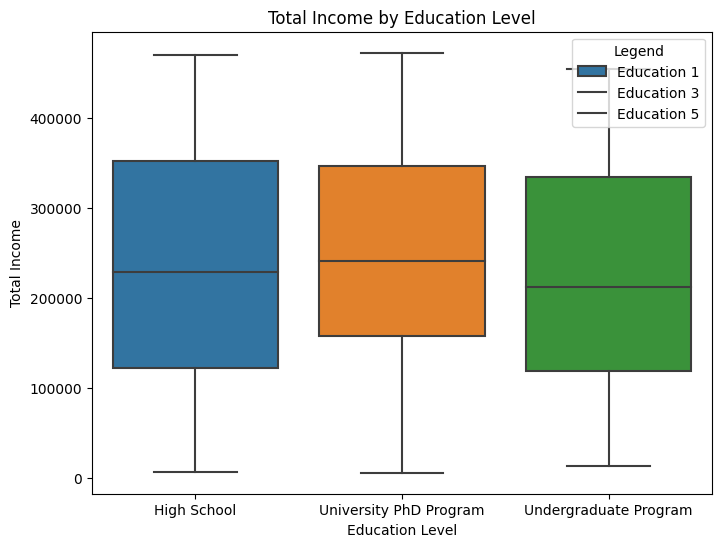

In [ ]:
# Filter the DataFrame for specific education levels
selected_education_levels = [1, 3, 5]
filtered_df = Clean_Q2_df[Clean_Q2_df['clt_education'].isin(selected_education_levels)]

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a box plot with a legend
sns.boxplot(x='clt_education', y='clt_inc', data=filtered_df)

# Set title and labels
plt.title('Total Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Total Income')

# Add labels for each education level
education_labels = {1: 'High School', 3: 'University PhD Program', 5: 'Undergraduate Program'}
plt.xticks(ticks=[0, 1, 2], labels=[education_labels[level] for level in selected_education_levels])

# Create a legend
legend_labels = [f"Education {level}" for level in selected_education_levels]
plt.legend(legend_labels, title='Legend', loc='upper right')

# Show the plot
plt.show()

 Violin plot that shows total income ([clt_inc]) by age ([clt_ind_age]) for specific education levels ([clt_education]).

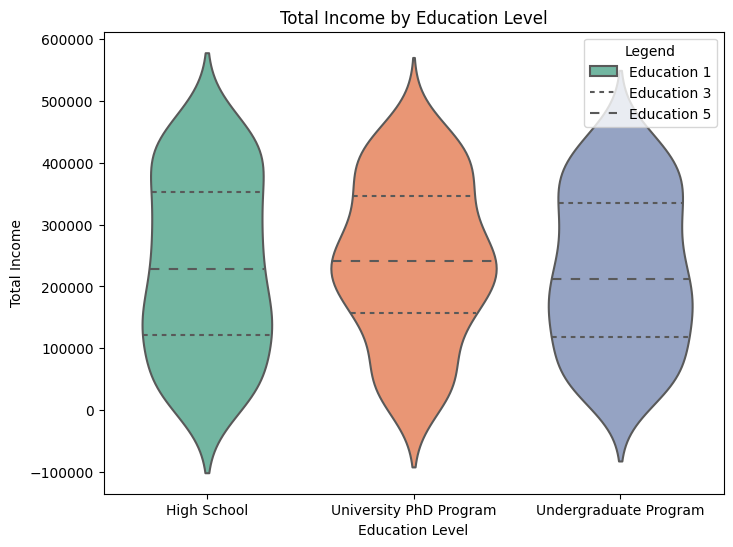

In [ ]:
# Filter the DataFrame for specific education levels
selected_education_levels = [1, 3, 5]
filtered_df = Clean_Q2_df[Clean_Q2_df['clt_education'].isin(selected_education_levels)]

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a violin plot with legends and colors
palette = sns.color_palette("Set2", len(selected_education_levels))
ax = sns.violinplot(x='clt_education', y='clt_inc', data=filtered_df, inner='quartile', palette=palette)

# Set title and labels
plt.title('Total Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Total Income')

# Add labels for each education level
education_labels = {1: 'High School', 3: 'University PhD Program', 5: 'Undergraduate Program'}
plt.xticks(ticks=[0, 1, 2], labels=[education_labels[level] for level in selected_education_levels])

# Create legends
legend_labels = [f"Education {level}" for level in selected_education_levels]
ax.legend(legend_labels, title='Legend', loc='upper right')

# Show the plot
plt.show()

Swarm plot that shows total income ([clt_inc]) by age ([clt_ind_age]) for specific education levels ([clt_education]).

<ipython-input-30-5589315ea38d>:9: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.swarmplot(x='clt_education', y='clt_inc', data=filtered_df, palette=palette)


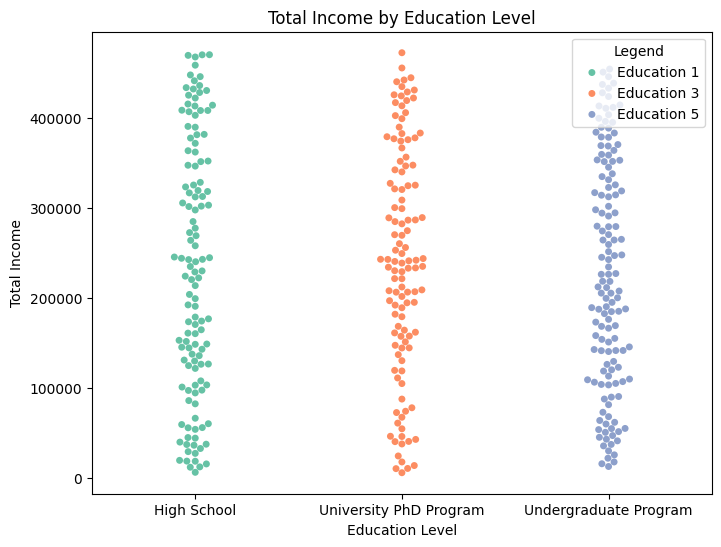

In [ ]:
selected_education_levels = [1, 3, 5]
filtered_df = Clean_Q2_df[Clean_Q2_df['clt_education'].isin(selected_education_levels)]

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a swarm plot with legends and colors
palette = sns.color_palette("Set2", len(selected_education_levels))
ax = sns.swarmplot(x='clt_education', y='clt_inc', data=filtered_df, palette=palette)

# Set title and labels
plt.title('Total Income by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Total Income')

# Add labels for each education level
education_labels = {1: 'High School', 3: 'University PhD Program', 5: 'Undergraduate Program'}
plt.xticks(ticks=[0, 1, 2], labels=[education_labels[level] for level in selected_education_levels])

# Create legends
legend_labels = [f"Education {level}" for level in selected_education_levels]
ax.legend(legend_labels, title='Legend', loc='upper right')

# Show the plot
plt.show()

**4C** - What relationship might you expect between total income ([clt_inc]), age ([clt_ind_age]), and the specified education ([clt_education]) levels? Are your expectations different from those on the graph? If so, explain how

Checking for relationships using one-way ANOVA.

In [ ]:
!pip install scipy
import scipy.stats

selected_education_levels = [1, 3, 5]
filtered_df = Clean_Q2_df[Clean_Q2_df['clt_education'].isin(selected_education_levels)]

# Perform one-way ANOVA to test for income differences among education levels
result = scipy.stats.f_oneway(filtered_df[filtered_df['clt_education'] == 1]['clt_inc'],
                  filtered_df[filtered_df['clt_education'] == 3]['clt_inc'],
                  filtered_df[filtered_df['clt_education'] == 5]['clt_inc'])

# Print the ANOVA result
print("ANOVA p-value:", result.pvalue)

ANOVA p-value: 0.5935228878789163


Understanding Sequence Lenght through Statistics

In [ ]:
statistics =  Clean_Q2_df.describe().round(2)
print(statistics)

       indv_id    clt_inc  clt_ind_age  clt_sex  clt_mstatus  clt_method  \
count   611.00     611.00       611.00   611.00       611.00      611.00   
mean    306.00  233289.88        42.77     1.01         0.51        0.48   
std     176.52  131862.02        24.58     0.81         0.50        0.50   
min       1.00    5591.00         1.00     0.00         0.00        0.00   
25%     153.50  125427.50        22.50     0.00         0.00        0.00   
50%     306.00  232366.00        42.00     1.00         1.00        0.00   
75%     458.50  349590.00        63.00     2.00         1.00        1.00   
max     611.00  472674.00        86.00     2.00         1.00        1.00   

       clt_animal  clt_education  
count       611.0         611.00  
mean          0.5           3.04  
std           0.5           1.45  
min           0.0           1.00  
25%           0.0           2.00  
50%           1.0           3.00  
75%           1.0           4.00  
max           1.0           5.00  
